# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

2.2.0


## Let's discuss the Convolution operation

We have an overlay, multiply and add process encapsulated in the term called convolution. We have kernels that convolve themselves with images to give us the output image. The nitty gritty gets us into the world of matrix sizes. We have:

`output_height = input_height - kernel_height + 1`

and 

`output_width = input_width - kernel_width + 1`

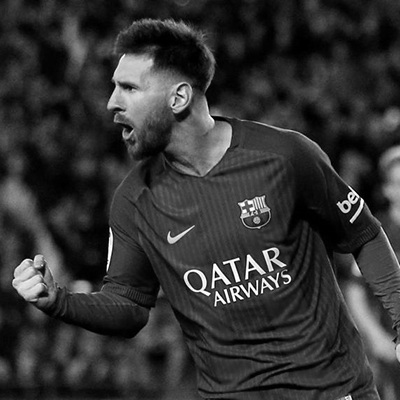

In [104]:
from google.colab.patches import cv2_imshow
input_image = cv2.imread("sample_data/original.jpg", 0)
cv2_imshow(input_image)

## I'm sick of these zeros and those kernels so let's talk about it

I can either be valid to get a smaller output, same to equal the input size, or be full and get a larger image.

### Output size

`valid = N - K + 1`

`same = N`

`full = N + K - 1` 


In [0]:
def convolution(input_image, kernel_image):
  # So we'll coded the convolution operation here; from scratch ! 
  input_width = input_image.shape[1]
  input_height = input_image.shape[0]
  kernel_width = kernel_image.shape[1]
  kernel_height = kernel_image.shape[0]
  output_height = input_height - kernel_height + 1
  output_width = input_width - kernel_width + 1
  output = np.zeros((output_height, output_width))
  for k in range(0, output_height):
    for j in range(0, output_width):
      for w in range(0, kernel_height):
        for v in range(0, kernel_width):
          output[k, j] += input_image[k+w, j+v] * kernel_image[w, v]
  return output

In [0]:
def convolution_flipped(input_image, kernel_image):
  # So we'll coded the convolution operation here; from scratch ! 
  input_width = input_image.shape[1]
  input_height = input_image.shape[0]
  kernel_width = kernel_image.shape[1]
  kernel_height = kernel_image.shape[0]
  output_height = input_height - kernel_height + 1
  output_width = input_width - kernel_width + 1
  output = np.zeros((output_height, output_width))
  for k in range(0, output_height):
    for j in range(0, output_width):
      for w in range(0, kernel_height):
        for v in range(0, kernel_width):
          output[k, j] += input_image[k-w, j-v] * kernel_image[w, v]
  return output

In [107]:
kernel_image = np.array([-5, -5, -5, 0, 0, 0, 5, 5, 5]).reshape(3,3)
kernel_image

array([[-5, -5, -5],
       [ 0,  0,  0],
       [ 5,  5,  5]])

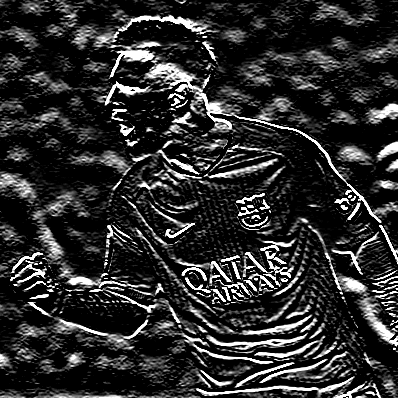

In [108]:
output = convolution(input_image, kernel_image)
cv2_imshow(output)

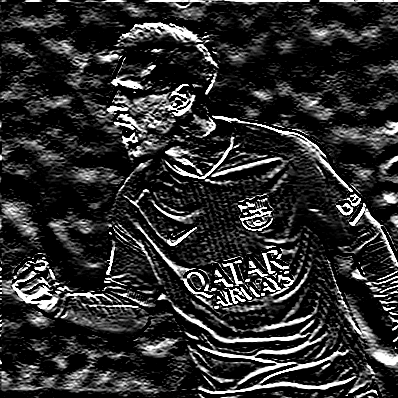

In [109]:
output = convolution_flipped(input_image, kernel_image)
cv2_imshow(output)

## Do we have to write such complicated equations? 

Well no, scipy has convolve2d, which does all the convolutions for us!, 
BUT WAIT
Do they flip it? let's find out


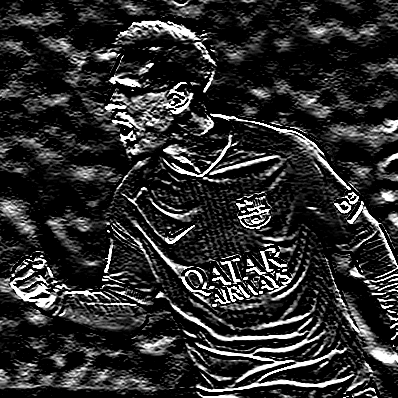

In [110]:
from scipy.signal import convolve2d, correlate2d
output = convolve2d(input_image, kernel_image, mode = 'valid')
cv2_imshow(output)

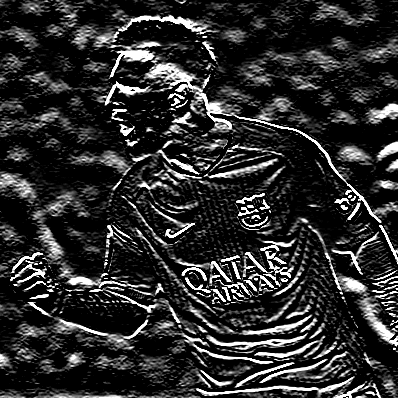

In [111]:
# The output shows a flipped filter, let's try correlation
output = correlate2d(input_image, kernel_image, mode = 'valid')
cv2_imshow(output)

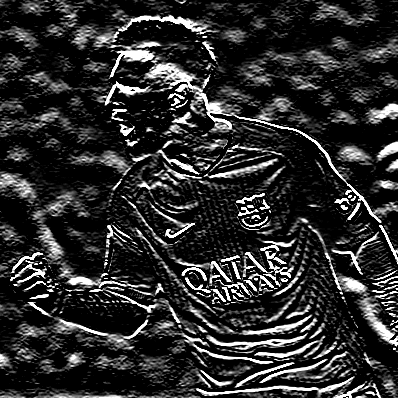

In [112]:
output = convolve2d(input_image, np.fliplr(np.flipud(kernel_image)), mode = 'valid')
cv2_imshow(output)

## Let's talk about color convolution

Suppose: 

input image = 28 x 28 x 3

filter = 3 x 5 x 5 x 64

## the filter shape 3 x 5 x 5 x 64 = 4800 is the number of weights 

Output image =  (28 - 5 + 1) x (28 - 5 + 1) x 64

## CONVOLUTION IN COLORS

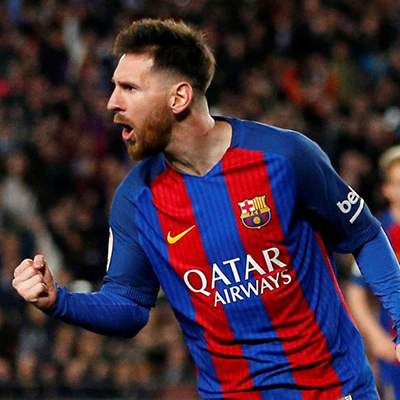

In [113]:
from google.colab.patches import cv2_imshow
input_image = cv2.imread("sample_data/original.jpg")
cv2_imshow(input_image)

In [114]:
input_image.shape

(400, 400, 3)

In [153]:
filters = np.array([-5, -5, -5, 0, 0, 0, 5, 5, 5]).reshape(3,3)
kernel_image = np.array([filters, filters, filters])
kernel_image

array([[[-5, -5, -5],
        [ 0,  0,  0],
        [ 5,  5,  5]],

       [[-5, -5, -5],
        [ 0,  0,  0],
        [ 5,  5,  5]],

       [[-5, -5, -5],
        [ 0,  0,  0],
        [ 5,  5,  5]]])

In [154]:
kernel_image.shape

(3, 3, 3)

In [0]:
def convolution3d(input_image, kernel_image):
  # So we'll coded the convolution operation here; from scratch ! 
  input_width = input_image.shape[1]
  input_height = input_image.shape[0]
  kernel_width = kernel_image.shape[1]
  kernel_height = kernel_image.shape[0]
  output_height = input_height - kernel_height + 1
  output_width = input_width - kernel_width + 1
  output = np.zeros((output_height, output_width, input_image.shape[2]))
  for c in range(0, input_image.shape[2]):
    for k in range(0, output_height):
      for j in range(0, output_width):
        for w in range(0, kernel_height):
          for v in range(0, kernel_width):
            output[k, j, c] += input_image[k+w, j+v, c] * kernel_image[w, v, c]
  return output

In [0]:
def correlation3d(input_image, kernel_image):
  # So we'll coded the convolution operation here; from scratch ! 
  input_width = input_image.shape[1]
  input_height = input_image.shape[0]
  kernel_width = kernel_image.shape[1]
  kernel_height = kernel_image.shape[0]
  output_height = input_height - kernel_height + 1
  output_width = input_width - kernel_width + 1
  output = np.zeros((output_height, output_width, input_image.shape[2]))
  for c in range(0, input_image.shape[2]):
    for k in range(0, output_height):
      for j in range(0, output_width):
        for w in range(0, kernel_height):
          for v in range(0, kernel_width):
            output[k, j, c] += input_image[k-w, j-v, c] * kernel_image[w, v, c]
  return output

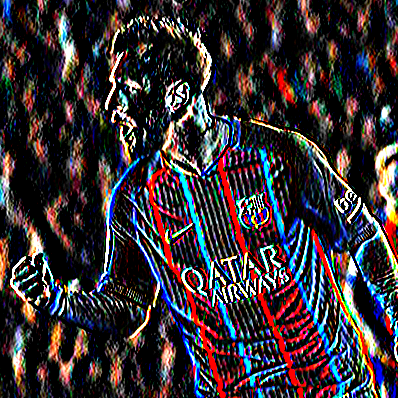

In [157]:
output = convolution3d(input_image, kernel_image)
cv2_imshow(output)

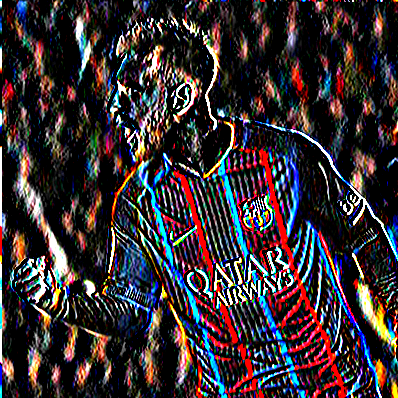

In [158]:
output = correlation3d(input_image, kernel_image)
cv2_imshow(output)

In [165]:
filters = np.array([0, -1, 0, -1, 2, -1, 0, -1, 0]).reshape(3,3)
kernel_image = np.array([filters, filters, filters])
kernel_image

array([[[ 0, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  0]],

       [[ 0, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  0]],

       [[ 0, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  0]]])

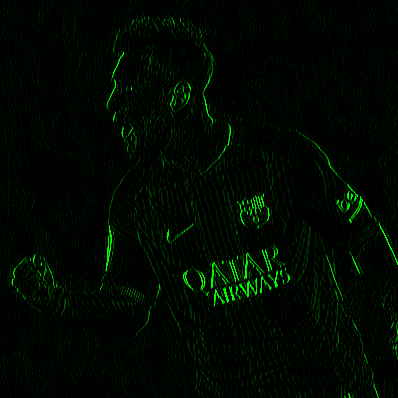

In [166]:
output = convolution3d(input_image, kernel_image)
cv2_imshow(output)